<a href="https://colab.research.google.com/github/Amin1771/DL-notebooks/blob/main/Cats_%26_Dogs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Uploding the dataset
*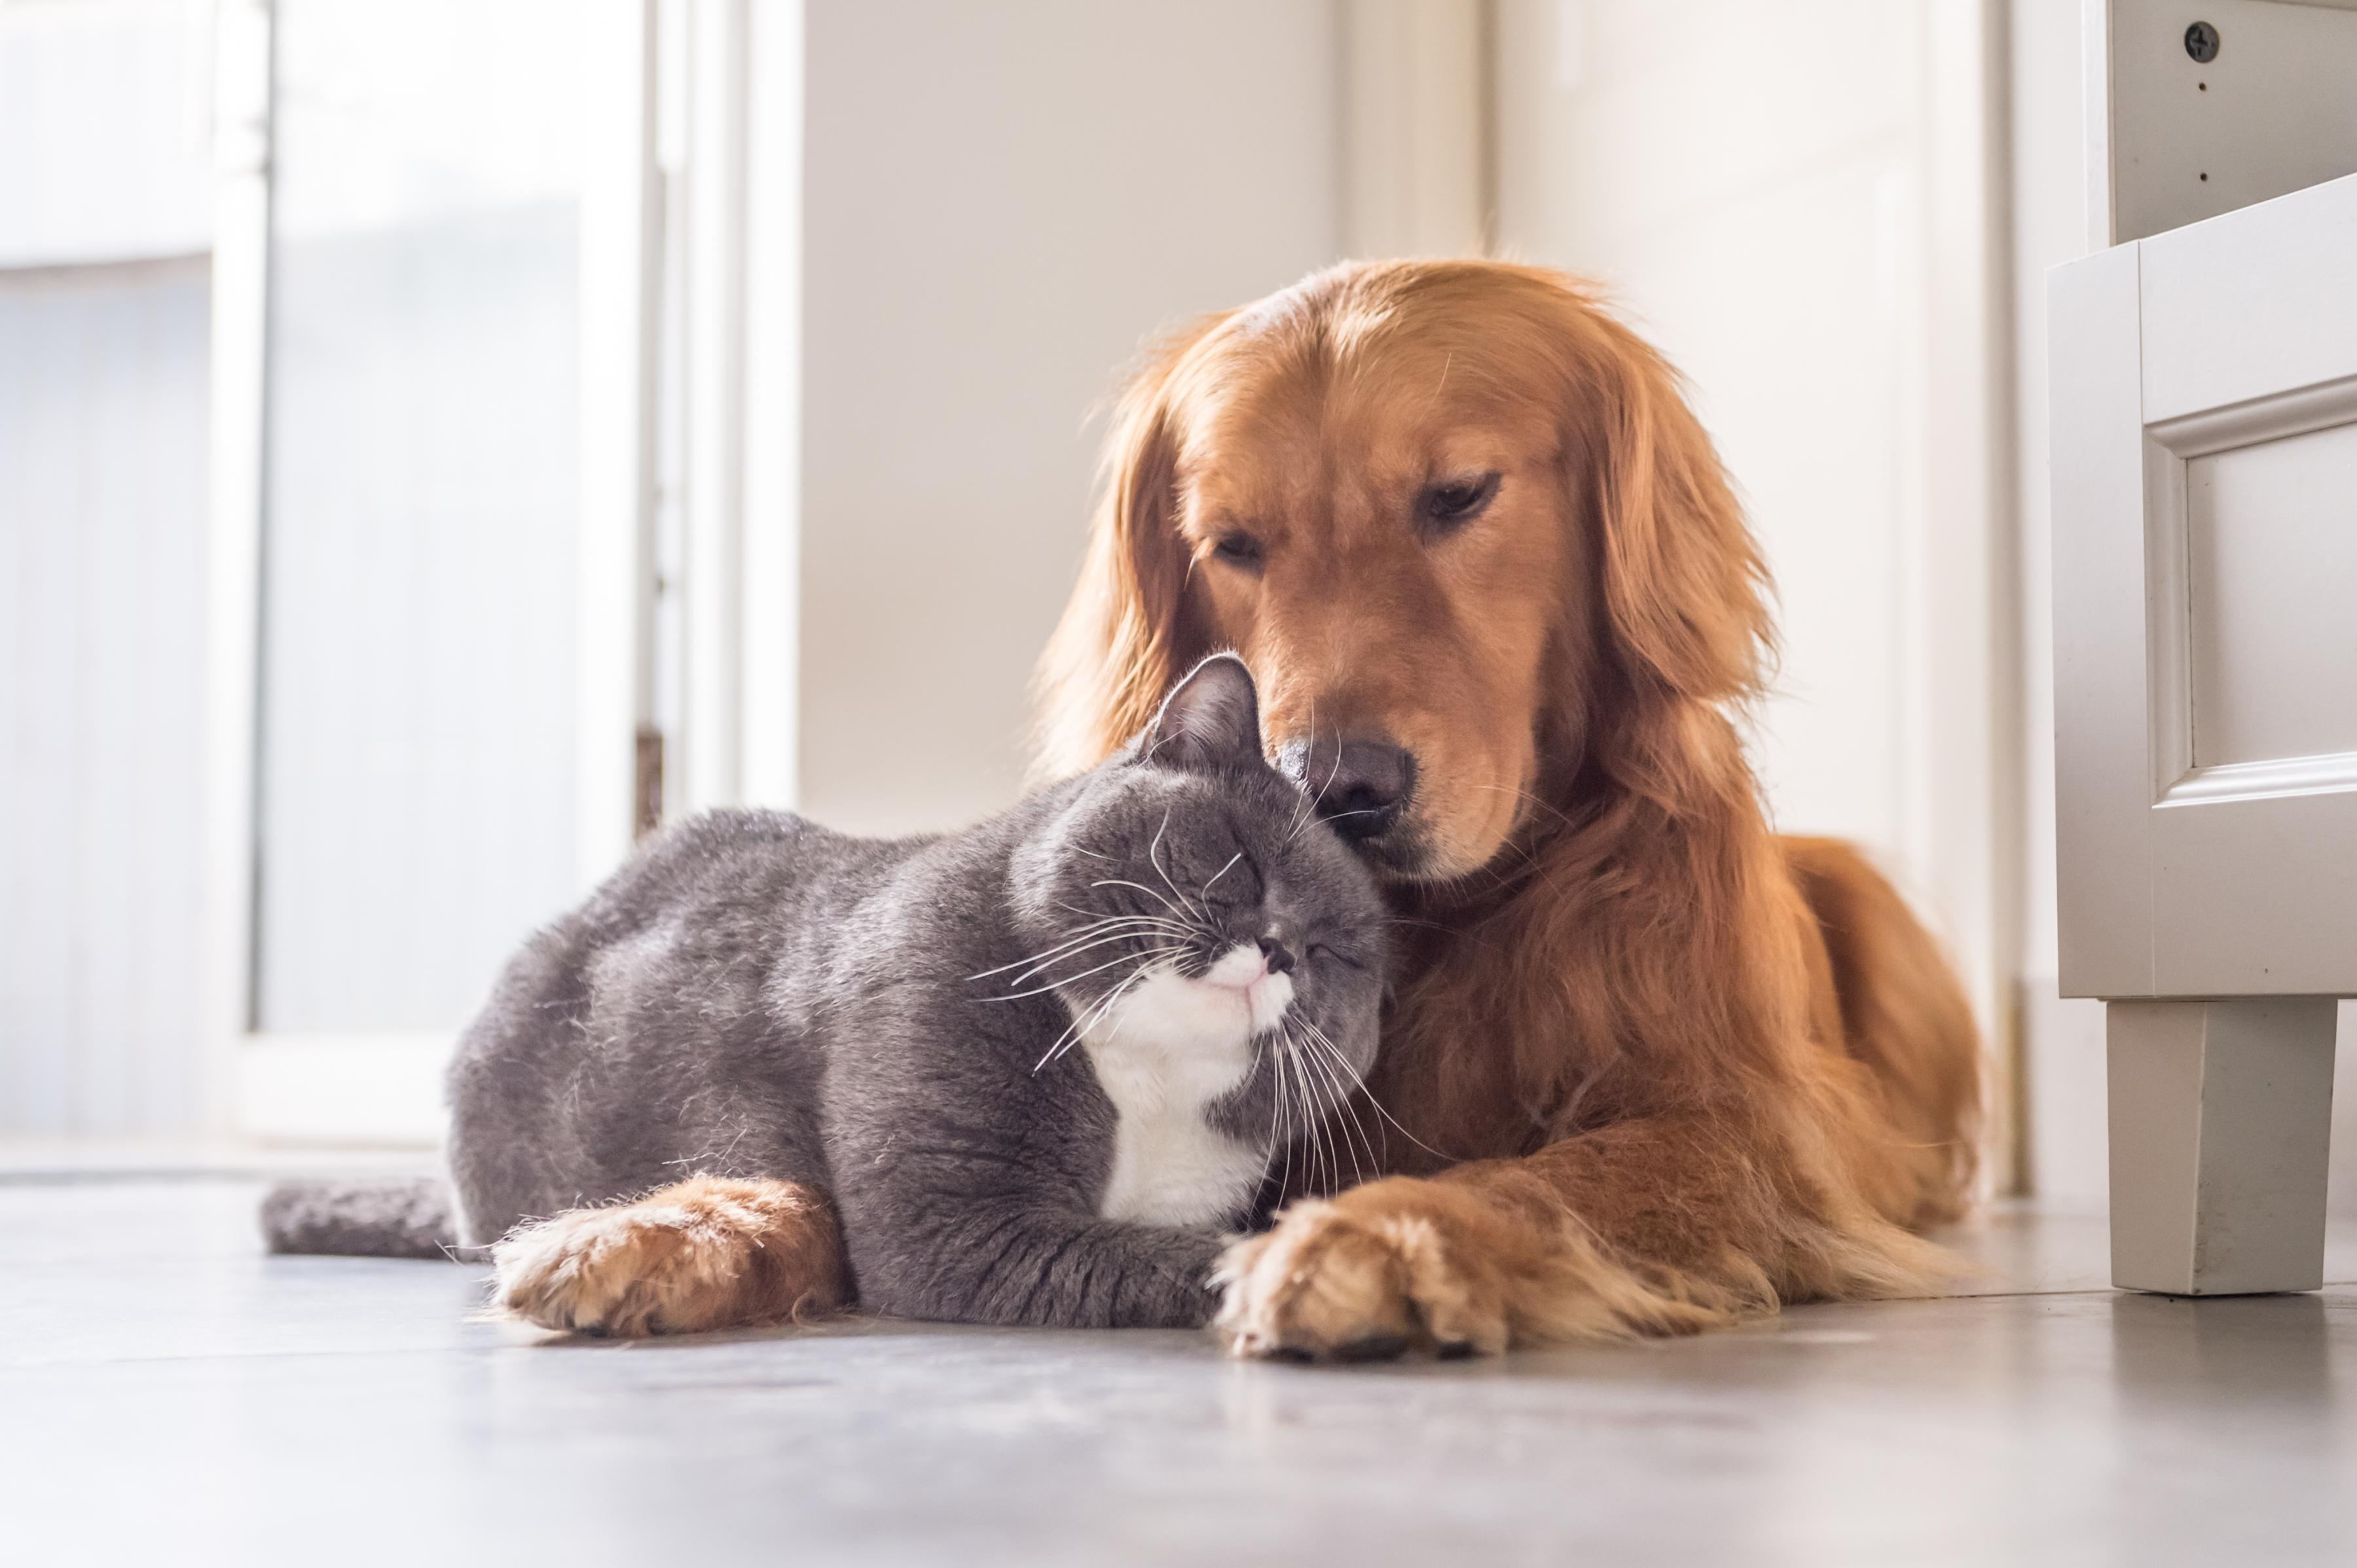

Uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


Unziping the dataset

In [ ]:
import zipfile
import os

# Unzip the file
local_zip = '/content/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip

zip

Importing the libraries




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


Creating directories

In [ ]:
train_dir = '/content/train'  # Update path if necessary

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Adjust size as needed
    batch_size=20,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)


Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,  # Adjust based on needs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 261ms/step - accuracy: 0.5292 - loss: 1.3858 - val_accuracy: 0.5100 - val_loss: 0.6925
Epoch 2/15
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4500 - loss: 0.6967

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4500 - loss: 0.6967 - val_accuracy: 0.4000 - val_loss: 0.6986
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.4950 - loss: 0.6926 - val_accuracy: 0.5200 - val_loss: 0.6887
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5714 - loss: 0.6866 - val_accuracy: 0.7000 - val_loss: 0.6908
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6143 - loss: 0.6783 - val_accuracy: 0.5200 - val_loss: 0.6860
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.6000 - loss: 0.6636 - val_accuracy: 0.4000 - val_loss: 0.6985
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.6317 - loss: 0.6597 - val_accuracy: 0.5400 - val_loss: 0.6987
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.6508 - val_accuracy: 0.6000 - val_loss: 0.6880
Epoch 9/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7060 - loss: 0.6220 - val_accuracy: 0.6100 - val_loss: 

Visualization

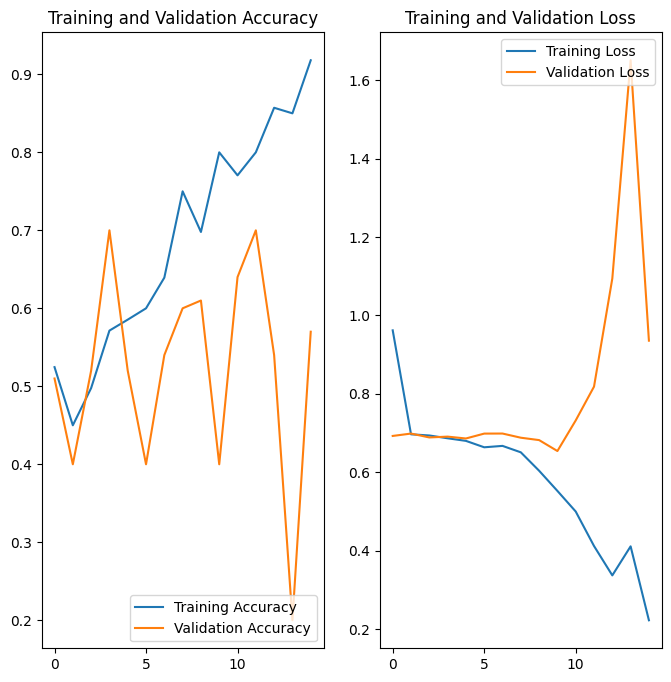

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Adding data augmention and transfer learning and fine tuning

Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 892ms/step - accuracy: 0.6208 - loss: 0.7854 - val_accuracy: 0.8229 - val_loss: 0.4623 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6875 - loss: 0.6034 - val_accuracy: 0.9286 - val_loss: 0.3598 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 397ms/step - accuracy: 0.7912 - loss: 0.4406 - val_accuracy: 0.8646 - val_loss: 0.3048 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6816 - loss: 0.6088 - val_accuracy: 0.8333 - val_loss: 0.3887
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7812 - loss: 0.4286 - val_accuracy: 0.9286 - val_loss: 0.3810
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - accuracy: 0.7262 - loss: 0.5323 - val_accuracy: 0.8646 - val_loss: 0.3481
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7812 - 

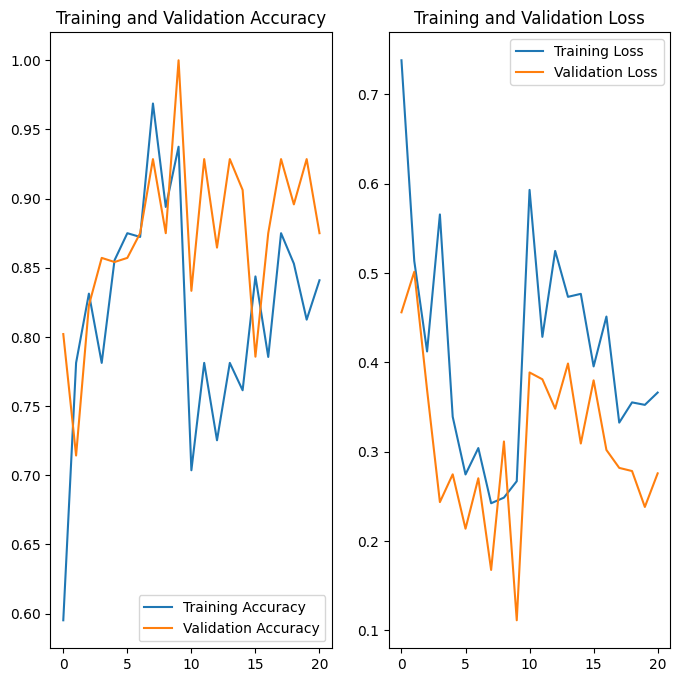

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set up data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting the dataset for validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/train',  # Update path if necessary
    target_size=(224, 224),  # MobileNetV2 default input size
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/train',  # Update path if necessary
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load the MobileNetV2 model
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,  # Exclude the top layer of MobileNetV2
                         weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
initial_epochs = 10  # You can adjust this as needed
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6, verbose=1)

# Train model with ReduceLROnPlateau
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, reduce_lr]
)
# Unfreeze some layers of the base model
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers for fine-tuning
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fine-tune the model
fine_tune_epochs = 10  # Additional epochs for fine-tuning
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

# Plot training history
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
